In [19]:
# %load Model_Pycharm.py
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

df_test_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/test.csv")
df_train_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/train.csv")
#df_train_original.info()
df_test_original.info()
df_train_original.info()
df_test = df_test_original.copy()
df_train = df_train_original.copy()

del df_train['Cabin']
df_train=df_train.dropna(subset=['Age', 'Embarked'])
df_train.info()
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())
#print(women.shape)
#print(sum(women))
#print(len(women))
#print(women)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

MISSING VALS IN THE TRAINING SET:
Age         177
Cabin       687
Embarked      2
dtype: int64


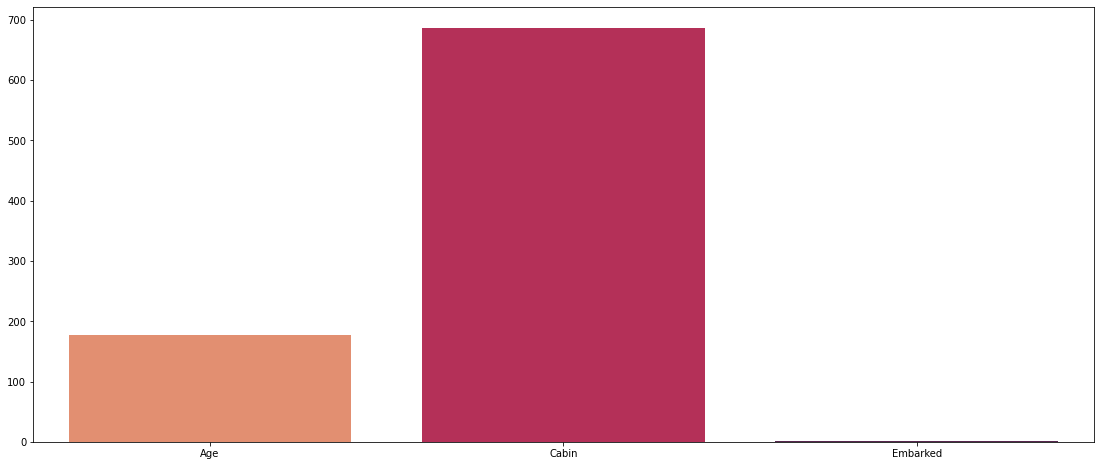

['Age', 'Cabin', 'Embarked']


In [27]:
nan_cols = df_train_original.columns[df_train_original.isna().any()].tolist()
plt.figure(figsize=(19,8))
nan_count_cols = df_train_original[nan_cols].isna().sum()
print("MISSING VALS IN THE TRAINING SET:")
print(colored(nan_count_cols, "green"))
sns.barplot(y=nan_count_cols, x=nan_cols, palette='rocket_r')
plt.show()
print(nan_cols)

In [ ]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
male = df_train.loc[df_train.Sex == 'male']["Survived"]

rate_women = sum(women)/len(women)
rate_male = sum(male)/len(male)
print(rate_male*100, rate_women*100)

20.52980132450331 75.2895752895753


In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [ ]:
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())
        

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5]


In [ ]:
print (df_train['Fare'].mean(),df_train['Fare'].max(),
df_train['Fare'].min())

34.567251404494385 512.3292 0.0


In [ ]:
y = df_train["Survived"]
print(y.shape)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
print(X.shape)
X_test = pd.get_dummies(df_test[features])
print(X_test.shape)
model = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions.shape)
print(df_test.shape)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_prediction_Cesar.csv', index=False)
print("Your submission was successfully saved!")

(712,)
(712, 5)
(418, 5)
(418,)
(418, 11)
Your submission was successfully saved!
